<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-loading" data-toc-modified-id="Data-loading-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data loading</a></span></li><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data pre-processing</a></span><ul class="toc-item"><li><span><a href="#technical-indicators-generation" data-toc-modified-id="technical-indicators-generation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>technical indicators generation</a></span></li><li><span><a href="#normalization" data-toc-modified-id="normalization-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>normalization</a></span></li><li><span><a href="#principal-components-analysis" data-toc-modified-id="principal-components-analysis-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>principal components analysis</a></span></li></ul></li><li><span><a href="#FFNN:-feed-foreward" data-toc-modified-id="FFNN:-feed-foreward-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>FFNN: feed-foreward</a></span></li><li><span><a href="#FFNN:-Jacobian-matrixes-set-up" data-toc-modified-id="FFNN:-Jacobian-matrixes-set-up-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>FFNN: Jacobian matrixes set-up</a></span></li><li><span><a href="#FFNN:-particle-swarm-optimization" data-toc-modified-id="FFNN:-particle-swarm-optimization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>FFNN: particle swarm optimization</a></span></li><li><span><a href="#FFNN:-mini-batch-stochastic-GD" data-toc-modified-id="FFNN:-mini-batch-stochastic-GD-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>FFNN: mini-batch stochastic GD</a></span></li><li><span><a href="#ARDL:-augmented-Dicky–Fuller-test" data-toc-modified-id="ARDL:-augmented-Dicky–Fuller-test-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>ARDL: augmented Dicky–Fuller test</a></span></li><li><span><a href="#Train,-validation,-test-split" data-toc-modified-id="Train,-validation,-test-split-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Train, validation, test split</a></span><ul class="toc-item"><li><span><a href="#for-ARDL-model" data-toc-modified-id="for-ARDL-model-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>for ARDL model</a></span></li><li><span><a href="#for-FFNN-model" data-toc-modified-id="for-FFNN-model-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>for FFNN model</a></span></li><li><span><a href="#clarifications-on-datasets" data-toc-modified-id="clarifications-on-datasets-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>clarifications on datasets</a></span></li></ul></li><li><span><a href="#FFNN:-back-propogation" data-toc-modified-id="FFNN:-back-propogation-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>FFNN: back-propogation</a></span></li><li><span><a href="#FFNN:-hyperparameter-tunning" data-toc-modified-id="FFNN:-hyperparameter-tunning-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>FFNN: hyperparameter tunning</a></span></li><li><span><a href="#FFNN:-model-performance-on-test-set" data-toc-modified-id="FFNN:-model-performance-on-test-set-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>FFNN: model performance on test set</a></span></li><li><span><a href="#ARDL:-hyperparameter-tunning" data-toc-modified-id="ARDL:-hyperparameter-tunning-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>ARDL: hyperparameter tunning</a></span></li><li><span><a href="#ARDL:-model-performance-on-test-set" data-toc-modified-id="ARDL:-model-performance-on-test-set-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>ARDL: model performance on test set</a></span></li><li><span><a href="#Summary-of-model-performance" data-toc-modified-id="Summary-of-model-performance-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Summary of model performance</a></span></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Appendix</a></span><ul class="toc-item"><li><span><a href="#data-extraction-at-the-first-semester" data-toc-modified-id="data-extraction-at-the-first-semester-15.1"><span class="toc-item-num">15.1&nbsp;&nbsp;</span>data extraction at the first semester</a></span></li><li><span><a href="#generate-20-technical-indicators-(dirty-work)" data-toc-modified-id="generate-20-technical-indicators-(dirty-work)-15.2"><span class="toc-item-num">15.2&nbsp;&nbsp;</span>generate 20 technical indicators (dirty work)</a></span></li><li><span><a href="#code-of-MBSGD-with-plotting" data-toc-modified-id="code-of-MBSGD-with-plotting-15.3"><span class="toc-item-num">15.3&nbsp;&nbsp;</span>code of MBSGD with plotting</a></span></li></ul></li></ul></div>

In [2]:
import time
import math
import datetime 
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# https://www.5axxw.com/wiki/content/aeduov
import pandas_ta as ta

import fix_yahoo_finance as yf
import pandas_datareader.data as pdr

# https://www.statsmodels.org/stable/tsa.html#tsa-tools
from statsmodels.tsa.api import ARDL
from statsmodels.tsa.ardl import ardl_select_order
from statsmodels.tsa.stattools import adfuller

pd.set_option('display.max_columns',None) 

# Data loading

In [3]:
# read data from previously downloaded files

# 7 advanced economies
df_US          = pd.read_csv('./US.csv')
df_Canada      = pd.read_csv('./Canada.csv')
df_Japan       = pd.read_csv('./Japan.csv')
df_Hong_Kong   = pd.read_csv('./Hong_Kong.csv')
df_Spain       = pd.read_csv('./Spain.csv')
df_France      = pd.read_csv('./France.csv')
df_Netherlands = pd.read_csv('./Netherlands.csv')

# 6 emerging economies
df_Brazil      = pd.read_csv('./Brazil.csv')
df_Mexico      = pd.read_csv('./Mexico.csv')
df_China       = pd.read_csv('./China.csv')
df_Turkey      = pd.read_csv('./Turkey.csv')
df_Indonesia   = pd.read_csv('./Indonesia.csv')
df_India       = pd.read_csv('./India.csv')

In [4]:
# create df_full containing data of all the economies
df_list     = [df_US,df_Canada,df_Japan,df_Hong_Kong,df_Spain,df_France,df_Netherlands,
               df_Brazil,df_Mexico,df_China,df_Turkey,df_Indonesia,df_India]
region_list = ['US','Canada','Japan','Hong_Kong','Spain','France','Netherlands',
               'Brazil','Mexico','China','Turkey','Indonesia','India']

# add region name and change col names
for df, region in zip(df_list, region_list):
    df['region'] = region
    df.rename(columns = {'Adj Close':'return_next_day','Date':'datetime','High':'high',
                         'Low':'low','Open':'open','Close':'close','Volume':'volume'}, 
              inplace = True)
    
# select the data within the observation period 2010-2020
for i, df in enumerate(df_list):
    selection_logic = (df.datetime >= '2010-01-01') & (df.datetime <= '2020-12-31')
    df_list[i] = df.loc[selection_logic,:].reset_index(drop=True)
    # create col 'return_next_day'
    df_list[i]['return_next_day'] = np.nan
    df_list[i].loc[:,'return_next_day'] = df_list[i]['close'].shift(-1)
    # df_list[i].loc[:,'return_next_day'] = df_list[i]['close'].shift(-1) - df_list[i]['close']
    
# df_full = pd.concat(df_list, ignore_index = True)
df_list[0]

,datetime,high,low,open,close,volume,return_next_day,region
0,2010-01-04,1133.869995,1116.560059,1116.560059,1132.989990,3991400000,1136.520020,US
1,2010-01-05,1136.630005,1129.660034,1132.660034,1136.520020,2491020000,1137.140015,US
2,2010-01-06,1139.189941,1133.949951,1135.709961,1137.140015,4972660000,1141.689941,US
3,2010-01-07,1142.459961,1131.319946,1136.270020,1141.689941,5270680000,1144.979980,US
4,2010-01-08,1145.390015,1136.219971,1140.520020,1144.979980,4389590000,1146.979980,US
...,...,...,...,...,...,...,...,...
2764,2020-12-24,3703.820068,3689.320068,3694.030029,3703.060059,1885090000,3735.360107,US
2765,2020-12-28,3740.510010,3723.030029,3723.030029,3735.360107,3527460000,3727.040039,US
2766,2020-12-29,3756.120117,3723.310059,3750.010010,3727.040039,3387030000,3732.040039,US
2767,2020-12-30,3744.629883,3730.209961,3736.189941,3732.040039,3145200000,3756.070068,US


In [5]:
# count how many instances in each region
print('How many instances in each dataset')
for region, df in zip(region_list, df_list):
    print('{:<12} {:>5d} '.format(region+':', df.shape[0]))

How many instances in each dataset
US:           2769 
Canada:       2760 
Japan:        2690 
Hong_Kong:    2705 
Spain:        2812 
France:       2810 
Netherlands:  2813 
Brazil:       2716 
Mexico:       2753 
China:        2670 
Turkey:       2762 
Indonesia:    2680 
India:        2701 


# Data pre-processing

## technical indicators generation

In [6]:
# using pandas_ta package as the origion paper indicates
n = 10; k = 15

# create the custom strategy for 20 technical indicators
CustomStrategy = ta.Strategy(
    name = 'could use help(ta.xxx) to check the definition & calculation',
    ta=[
        {"kind": "sma",  "length": n},
        {"kind": "ema",  "length": n},
        {"kind": "macd", "fast"  : n , "slow": k},
        {"kind": "adx",  "length": n},
        {"kind": "cci",  "length": n},
        {"kind": "mom",  "length": n},
        {"kind": "roc",  "length": n},
        {"kind": "rsi",  "length": n},
        {"kind": "tsi",  "length": n},
        {"kind": "kdj",  "length": n}, # it includes k%, d%, j%
        {"kind": "atr",  "length": n},
        {"kind": "ui" ,  "length": n},
        {"kind": "ad" ,  "length": n},
        {"kind": "obv",  "length": n}]
)

# generate technical indicators
for i, df in enumerate(df_list):
    df_list[i].ta.strategy(CustomStrategy)

In [7]:
# clean dataframes
for i, df in enumerate(df_list):
    cols = ['region','datetime','return_next_day','high','low','open','close','SMA_10',
            'EMA_10','MACD_10_15_9','ADX_10','CCI_10_0.015','MOM_10','ROC_10','RSI_10',
            'TSI_13_25_13','K_10_3','D_10_3','J_10_3','ATRr_10','UI_10','AD','OBV']
    # delete rows b/c loosing obeservations
    df_list[i] = df_list[i].loc[24:df_list[i].shape[0]-2,cols].reset_index(drop=True)

df_list[0].head()

,region,datetime,return_next_day,high,low,open,close,SMA_10,EMA_10,MACD_10_15_9,ADX_10,CCI_10_0.015,MOM_10,ROC_10,RSI_10,TSI_13_25_13,K_10_3,D_10_3,J_10_3,ATRr_10,UI_10,AD,OBV
0,US,2010-02-08,1070.520020,1071.199951,1056.510010,1065.510010,1056.739990,1082.389990,1082.543306,-10.285084,57.587779,-126.654054,-40.040039,-3.650690,29.557233,-31.395445,23.118601,22.250833,24.854138,18.309764,4.539277,7.000802e+09,6.047570e+09
1,US,2010-02-09,1068.130005,1079.280029,1060.060059,1060.060059,1070.520020,1080.224988,1080.357254,-9.682590,55.953294,-62.030614,-21.650024,-1.982294,38.281123,-29.437032,29.819572,24.779520,39.899674,18.765509,4.352115,7.453144e+09,1.116183e+10
2,US,2010-02-10,1078.469971,1073.670044,1059.339966,1069.680054,1068.130005,1077.287988,1078.134118,-9.166996,54.612874,-63.139191,-29.369995,-2.676082,37.388797,-28.068852,32.959493,27.510335,43.857808,18.291329,4.225706,8.417354e+09,6.910380e+09
3,US,2010-02-11,1075.510010,1080.040039,1060.589966,1067.099976,1078.469971,1076.681982,1078.195182,-8.002039,52.043317,-22.071395,-6.060059,-0.558773,43.697528,-25.530705,40.776666,31.936939,58.456122,18.414358,3.886038,1.210772e+10,1.131125e+10
4,US,2010-02-12,1094.869995,1077.810059,1062.969971,1075.949951,1075.510010,1076.845984,1077.706969,-7.154351,49.815438,-23.171415,1.640015,0.152720,42.340556,-23.735646,44.347519,36.076600,60.889358,18.106827,3.365921,1.497868e+10,7.150570e+09


## normalization

In [8]:
# normalization
for i, df in enumerate(df_list):
    df_list[i].iloc[:,3:] = df_list[i].iloc[:,3:].apply(
        lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
    
df_list[0].head()

#array_X = np.array(df_X_nor.T)
#array_y = np.array(df_y_nor.T)/1000 
# i think it would fit ANN more? ie., more close to 1?

,region,datetime,return_next_day,high,low,open,close,SMA_10,EMA_10,MACD_10_15_9,ADX_10,CCI_10_0.015,MOM_10,ROC_10,RSI_10,TSI_13_25_13,K_10_3,D_10_3,J_10_3,ATRr_10,UI_10,AD,OBV
0,US,2010-02-08,1070.520020,0.014046,0.016769,0.013907,0.012592,0.011971,0.011981,0.663575,0.852338,0.299200,0.597410,0.465038,0.234001,0.070086,0.198053,0.140825,0.341286,0.065068,0.242227,0.000000,0.000000
1,US,2010-02-09,1068.130005,0.017013,0.018075,0.011905,0.017672,0.011157,0.011159,0.667457,0.823227,0.412781,0.613287,0.504351,0.346376,0.089145,0.269842,0.170089,0.443280,0.067823,0.232220,0.000332,0.005466
2,US,2010-02-10,1078.469971,0.014953,0.017810,0.015439,0.016791,0.010053,0.010322,0.670780,0.799354,0.410833,0.606622,0.488003,0.334881,0.102459,0.303481,0.201692,0.470113,0.064957,0.225461,0.001039,0.000922
3,US,2010-02-11,1075.510010,0.017292,0.018269,0.014491,0.020602,0.009825,0.010345,0.678287,0.753590,0.483013,0.626746,0.537893,0.416145,0.127159,0.387229,0.252919,0.569076,0.065700,0.207301,0.003744,0.005626
4,US,2010-02-12,1094.869995,0.016473,0.019145,0.017742,0.019511,0.009887,0.010162,0.683750,0.713911,0.481080,0.633394,0.554659,0.398666,0.144628,0.425485,0.300826,0.585571,0.063842,0.179492,0.005849,0.001179


In [9]:
# there's a missing value issue, but with a very small proportion (5/2000)
# df_list_n[10]['UI_10'][df_list_n[10]['UI_10'].isna()==True]
print('How many missing values in each dataset')
for region, df in zip(region_list, df_list):
    print('{:<12} {:>5d} '.format(region+':', df.isna().sum().sum()))
    
# fill blanks using the most recent values
for i, df in enumerate(df_list):
    df_list[i]['UI_10'] = df_list[i]['UI_10'].fillna(method = 'ffill')
print('\nand all blanks have been filled')

How many missing values in each dataset
US:              0 
Canada:          0 
Japan:           2 
Hong_Kong:       5 
Spain:           0 
France:          0 
Netherlands:     0 
Brazil:          2 
Mexico:          0 
China:           0 
Turkey:          5 
Indonesia:       0 
India:           0 

and all blanks have been filled


## principal components analysis

In [10]:
def zeromean(dataframe):   
    """ 
    Args:    
    dataframe(pd.DataFrame)
    
    Returns:    
    dataframe_new(pd.DataFrame): de-meaned dataframe    
    mean(float): mean of each features
    """
    mean = np.mean(dataframe, axis = 0)     
    dataframe_new = dataframe - mean
    return dataframe_new, mean

def percentage_to_n(eig_vals, percentage):
    """
    Args:    
    eig_vals(np.array): eigenvalues of a matrix
    percentage(float): how much explanation needed
    
    Returns:    
    pca_num(int): how many eigenvectors needed to achieve the explanation
    """
    sort_eig_vals = np.sort(eig_vals)
    sort_eig_vals = sort_eig_vals[-1::-1]
    sum_eig_vals  = sum(sort_eig_vals)
    
    pca_sum = 0
    pca_num = 0
    
    for i in sort_eig_vals:
        pca_sum += i
        pca_num += 1
        if pca_sum >= sum_eig_vals * percentage:
            break
    
    return pca_num
 
def pca(dataframe, percentage = 0.99):
    """
    Args:    
    dataframe(pd.DataFrame)
    percentage(float): how much explanation needed
    
    Returns:    
    low_dimen_data(pd.DataFrame): dataframe after pca
    n(int): how many eigenvectors needed to achieve the explanation
    """
    dataframe_new, mean = zeromean(dataframe)
    
    cov_matrix = np.cov(dataframe_new, rowvar = 0)    
    eig_vals,eig_vects = np.linalg.eig(np.mat(cov_matrix))
    
    # choose how many pcs needed to explain 99%
    n = percentage_to_n(eig_vals, percentage)

    # choose top n
    eig_val_indice = np.argsort(eig_vals)
    n_eig_val_indice = eig_val_indice[-1:-(n+1):-1] 
    
    # reconstruct data
    n_eig_vect = eig_vects[:, n_eig_val_indice]
    low_dimen_data = dataframe_new @ n_eig_vect
    return low_dimen_data, n

In [11]:
# x partition and y partition
array_list_x = []
array_list_y = []

print('How many PCs extracted in each dataset for 99% explanation')
for region, df in zip(region_list, df_list):
    array_list_x.append(np.array(pca(df.iloc[:,3:])[0].T))
    print('{:<12} {:>5d} PCs '.format(region+':', pca(df.iloc[:,3:])[1]))

for region, df in zip(region_list, df_list):
    array_list_y.append(np.array(df.iloc[:,2].T))

How many PCs extracted in each dataset for 99% explanation
US:              8 PCs 
Canada:          8 PCs 
Japan:           8 PCs 
Hong_Kong:       9 PCs 
Spain:           9 PCs 
France:          9 PCs 
Netherlands:     8 PCs 
Brazil:          8 PCs 
Mexico:          9 PCs 
China:           8 PCs 
Turkey:          9 PCs 
Indonesia:       9 PCs 
India:           8 PCs 


In [12]:
# check dirty work using sklearn
from sklearn.decomposition import PCA
df_test = df_list[0].iloc[:,3:]
X = np.array(df_test)

pca = PCA(n_components=8)
pca_lib = pca.fit_transform(X)
pd.DataFrame(pca_lib).head()
# they are the same: proved

,0,1,2,3,4,5,6,7
0,-1.259054,0.778901,0.216105,0.476754,-0.007245,-0.268125,0.036703,0.162534
1,-1.235716,0.599162,0.284994,0.449431,-0.064480,-0.231209,0.065403,0.154753
2,-1.232980,0.557111,0.278169,0.427872,-0.042229,-0.234233,0.034970,0.157879
3,-1.209271,0.380910,0.317534,0.381648,-0.061154,-0.217395,0.055226,0.154106
4,-1.203119,0.326902,0.290218,0.340068,-0.029309,-0.230123,0.050211,0.155465


# FFNN: feed-foreward

In [13]:
# this function defines sigmoid activation function: f(x) = 1 / (1 + e^(-x))
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# this function defines the derivative of sigmoid function
def deriv_sigmoid(x):
    fx = sigmoid(x)
    return fx * (1 - fx)

# this function defines the loss function, Mean Squared Error (MSE)
def MSE(y_true, y_prediction):
    return ((y_true - y_prediction) ** 2).mean()

In [15]:
# this function initialises the network with the structure of 5 layers
# n1 is the number of neurons at the 1st hidden layer
# n2 is the number of neurons at the 2nd hidden layer
# n3 is the number of neurons at the 3rd hidden layer

## could change the neurons at each layer here
n1,  n2,  n3  = 5, 5, 5
ann_structure = [n1, n2, n3]

def parameters_reset (n1, n2, n3) :
    """ 
    Args:    
    n1,n2,n3(int): 
    how many neurons on each hidden layer
    
    Returns:    
    W1,W2,W3,W4,b1,b2,b3,b4(float): 
    parameters set (same at the each time)
    """
    # show that we are changing the global variables
    global W1, W2, W3, W4, b1, b2, b3, b4
    
    # to keep the initial parameters the same
    np.random.seed(42)
    
    W1 = np.random.randn(n1, num_input) / 2
    W2 = np.random.randn(n2, n1) / 2
    W3 = np.random.randn(n3, n2) / 2
    W4 = np.random.randn(1 , n3) / 2
    
    b1 = np.random.randn(n1, 1 ) / 2
    b2 = np.random.randn(n2, 1 ) / 2
    b3 = np.random.randn(n3, 1 ) / 2
    b4 = np.random.randn(1 , 1 ) / 2
    
# parameters_reset (n1, n2, n3)
    
# dimensions = n1 * num_input + n2 * n1 + n3 * n2 + 1 * n3 + n1 + n2 + n3 + 1
# print('hi, under this setting, totally {:} dimensions of parameter'.format(dimensions))

In [16]:
# This function realizes the Feedforward
def forward_prop (a0, W1, W2, W3, W4, b1, b2, b3, b4) :
    """ 
    Args:    
    a0(np.array): dataset (* which should be transposed)
    W1,W2,W3,W4,b1,b2,b3,b4(float): parameters
    
    Returns:    
    a0(np.array): dataset as the same as the input
    s1,a1,s2,a2,s3,a3,s4(np.array): results of FFNN
    """
    s1 = W1 @ a0 + b1
    a1 = sigmoid(s1) 
    s2 = W2 @ a1 + b2
    a2 = sigmoid(s2)
    s3 = W3 @ a2 + b3
    a3 = sigmoid(s3)
    s4 = W4 @ a3 + b4
    # since this is not a classification problem
    # I do not put activation function on the output layer
    
    # return multiple values
    return a0, s1, a1, s2, a2, s3, a3, s4

# FFNN: Jacobian matrixes set-up

In [18]:
# Jacobian for the weights of the output layer
def J_W4 (x, y) :
    # d c /s4 = - 2 * (y - s4) 
    J = - 2 * (y - s4) 
    # d s4/w4 = a3
    J = J @ a3.T / x.shape[1]
    return J

# Jacobian for the bias of the output layer
def J_b4 (x, y) :
    # d c /s4 = - 2 * (y - s4) 
    J = - 2 * (y - s4)
    # d s4/b4 = 1
    J = np.sum(J, axis=1, keepdims=True) / x.shape[1]
    return J

In [19]:
# Jacobian for the weights of the 3rd hidden layer
def J_W3 (x, y) :
    # d c /s4 = - 2 * (y - s4) 
    J = - 2 * (y - s4)
    # d s4/a3 = W4
    J = (J.T @ W4).T
    # d a3/s3 = s'(s3)
    J = J * deriv_sigmoid(s3)
    # d s3/W3 = a2
    J = J @ a2.T / x.shape[1]
    return J

# Jacobian for the bias of the 3rd hidden layer
def J_b3 (x, y) :
    # d c /s4 = - 2 * (y - s4) 
    J = - 2 * (y - s4)
    # d s4/a3 = W4
    J = (J.T @ W4).T
    # d a3/s3 = s'(s3)
    J = J * deriv_sigmoid(s3)   
    # d s3/b3 = 1
    J = np.sum(J, axis=1, keepdims=True) / x.shape[1]
    return J

In [20]:
# Jacobian for the weights of the 2nd hidden layer
def J_W2 (x, y) :
    # d c /s4 = - 2 * (y - s4) 
    J = - 2 * (y - s4)
    # d s4/a3 = W4
    J = (J.T @ W4).T
    # d a3/s3 = s'(s3)
    J = J * deriv_sigmoid(s3)
    # d s3/a2 = W3
    J = (J.T @ W3).T    
    # d a2/s2 = s'(s2)
    J = J * deriv_sigmoid(s2)  
    # d s2/W2 = a1
    J = J @ a1.T / x.shape[1]
    return J

# Jacobian for the biases of the 2nd hidden layer
def J_b2 (x, y) :
    # d c /s4 = - 2 * (y - s4) 
    J = - 2 * (y - s4)
    # d s4/a3 = W4
    J = (J.T @ W4).T
    # d a3/s3 = s'(s3)
    J = J * deriv_sigmoid(s3)
    # d s3/a2 = W3
    J = (J.T @ W3).T    
    # d a2/s2 = s'(s2)
    J = J * deriv_sigmoid(s2)  
    # d s2/b2 = 1
    J = np.sum(J, axis=1, keepdims=True) / x.shape[1]
    return J

In [21]:
# Jacobian for the weights of the 1st hidden layer
def J_W1 (x, y) :
    # d c /s4 = - 2 * (y - s4) 
    J = - 2 * (y - s4)
    # d s4/a3 = W4
    J = (J.T @ W4).T
    # d a3/s3 = s'(s3)
    J = J * deriv_sigmoid(s3)
    # d s3/a2 = W3
    J = (J.T @ W3).T    
    # d a2/s2 = s'(s2)
    J = J * deriv_sigmoid(s2)  
    # d s2/a1 = W2
    J = (J.T @ W2).T   
    # d a1/s1 = s'(s1)
    J = J * deriv_sigmoid(s1)   
    # d s1/W1 = a0
    J = J @ a0.T / x.shape[1]
    return J    

# Jacobian for the biases of the 1st hidden layer
def J_b1 (x, y) :
    # d c /s4 = - 2 * (y - s4) 
    J = - 2 * (y - s4)
    # d s4/a3 = W4
    J = (J.T @ W4).T
    # d a3/s3 = s'(s3)
    J = J * deriv_sigmoid(s3)
    # d s3/a2 = W3
    J = (J.T @ W3).T    
    # d a2/s2 = s'(s2)
    J = J * deriv_sigmoid(s2)  
    # d s2/a1 = W2
    J = (J.T @ W2).T   
    # d a1/s1 = s'(s1)
    J = J * deriv_sigmoid(s1)   
    # d s1/b1 = 1
    J = np.sum(J, axis=1, keepdims=True) / x.shape[1]
    return J

# FFNN: particle swarm optimization

In [22]:
# this function calculates MSE without gradient components
def MSE_calculation_in_PSO(ann_structure, array_x, array_y, paras):
    """ 
    Args:  
    ann_structure(list): include 3 numbers, indicating the neurons at each layer
    array_x(np.array): dataset (* which should be transposed)
    array_y(np.array): true values (* which should be transposed)
    paras(np.array): parameters
    
    Returns:    
    MSE(float): MSE at the input parameters
    """
    n1, n2, n3 = ann_structure
    num_input  = array_x.shape[0]
    # transform parameters from vector to matrix
    t1 = n1 * num_input
    t2 = t1 + n2 * n1
    t3 = t2 + n3 * n2
    t4 = t3 + n3
    t5 = t4 + n1
    t6 = t5 + n2
    t7 = t6 + n3
    t8 = t7 + 1
    
    return MSE(array_y, forward_prop(array_x, 
                                        paras[0  : t1].reshape(n1 , num_input), 
                                        paras[t1 : t2].reshape(n2 , n1), 
                                        paras[t2 : t3].reshape(n3 , n2), 
                                        paras[t3 : t4].reshape(1  , n3), 
                                        paras[t4 : t5].reshape(n1 ,  1), 
                                        paras[t5 : t6].reshape(n2 ,  1), 
                                        paras[t6 : t7].reshape(n3 ,  1), 
                                        paras[t7 : t8].reshape(1  ,  1))[7])

In [40]:
def pso(ann_structure, array_x, array_y):
    """ 
    Args:   
    ann_structure(list): include 3 numbers, indicating the neurons at each layer
    array_x(np.array): dataset (* which should be transposed)
    array_y(np.array): true values (* which should be transposed)
    
    Returns:    
    W1_pso, W2_pso, W3_pso, W4_pso, b1_pso, b2_pso, b3_pso, b4_pso(np.array): 
    parameters found by PSO
    """
    # 1. initialize the particles
    np.random.seed(42)
    
    n_particles = 50
    n1, n2, n3  = ann_structure
    num_input   = array_x.shape[0]
    dimensions  = n1 * num_input + n2 * n1 + n3 * n2 + 1 * n3 + n1 + n2 + n3 + 1

    # coordinate, [0,1]
    X = np.random.rand (dimensions, n_particles) / 2
    # velocity, from normal distribution
    V = np.random.randn(dimensions, n_particles) / 10

    # 2. period 1 initialization
    
    # p_best_loc: personal best location
    # p_best_obj: personal best objective function value
    # g_best_loc: global best location
    # g_best_obj: global best objective function value

    p_best_loc = X
    p_best_obj = np.array([MSE_calculation_in_PSO(ann_structure, 
                                                  array_x, 
                                                  array_y, 
                                                  paras) for paras in X.T])
    g_best_loc = p_best_loc[:,p_best_obj.argmin()]
    g_best_obj = p_best_obj.min()
    
    initial_loss = g_best_obj.copy()
    
    # print('hi, at the initialization, PSO finds {:4f} as MSE'.format(g_best_obj))
    
    # 3. algorithm
    
    # parameters setting
    # w: the inertia weight constant
    # it decides how much the particle should keep on with its previous velocity
    # c1: cognitive coefficient
    # it decides how much the particle should insist the search result of the particle
    # c2: social coefficients
    # it decides how much the particle should insist the search result of the swarm

    w, c1, c2, seed = 0.8, 0.1, 0.1, 0

    # iterations
    for i in range(100):
    
        # randomness in c1, c2
        np.random.seed(seed)
        r = np.random.rand(2)
    
        # velocity update
        V = w * V + c1 * r[0] * (p_best_loc - X) + \
                    c2 * r[1] * (g_best_loc.reshape(-1,1) - X)
        # position update
        X = X + V
    
        # objective at this round
        obj = np.array([MSE_calculation_in_PSO(ann_structure,
                                               array_x, 
                                               array_y, 
                                               paras) for paras in X.T])
    
        # personal best location update
        p_best_loc[:, (obj <= p_best_obj)] = X[:, (obj <= p_best_obj)]
        # personal best value update
        p_best_obj = np.array([p_best_obj, obj]).min(axis=0)
        # global best location update
        g_best_loc = p_best_loc[:,p_best_obj.argmin()]
        # global best value update
        g_best_obj = p_best_obj.min()
    
        seed += 1
    
        # print('hi, at the interation of {:}, PSO finds {:.4f} as MSE'.format(i+1, g_best_obj))
    
    t1 = n1 * num_input
    t2 = t1 + n2 * n1
    t3 = t2 + n3 * n2
    t4 = t3 + n3
    t5 = t4 + n1
    t6 = t5 + n2
    t7 = t6 + n3
    t8 = t7 + 1

        
    W1_pso = g_best_loc[0  : t1].reshape(n1 , num_input)
    W2_pso = g_best_loc[t1 : t2].reshape(n2 , n1)
    W3_pso = g_best_loc[t2 : t3].reshape(n3 , n2)
    W4_pso = g_best_loc[t3 : t4].reshape(1  , n3)
    b1_pso = g_best_loc[t4 : t5].reshape(n1 ,  1)
    b2_pso = g_best_loc[t5 : t6].reshape(n2 ,  1)
    b3_pso = g_best_loc[t6 : t7].reshape(n3 ,  1)
    b4_pso = g_best_loc[t7 : t8].reshape(1  ,  1)
    
    return W1_pso, W2_pso, W3_pso, W4_pso, b1_pso, b2_pso, b3_pso, b4_pso, initial_loss

    # print('\nthe optimal parameters have been kept within those suffixed as "_pso"')

# FFNN: mini-batch stochastic GD

In [23]:
# define the function that randomly sorts the data batches (size > 1)
# note: the data strcuture of X and y should be DataFrame
def batches(X, y, size, seed):
    """ 
    Args:    
    X(pd.DataFrame): dataset (* which should NOT be transposed)
    y(pd.DataFrame): true values (* which should NOT be transposed)
    
    Returns:    
    batches_full(list): data batches
    """
    # 1.fix this random seed at this moment, and this will be changed for each iteration
    np.random.seed(seed)
    # 2.number of total instances
    num_instances = X.shape[0]
    # 3.list initialized
    batches_full  = []
    
    # 4.shuffle X and y 
    shuf_order = list(np.random.permutation(num_instances))
    shuf_X     = X.iloc[shuf_order,:]
    shuf_y     = y.iloc[shuf_order,:]
    
    # 5.get the maximum number of the batches could be reached
    num_batch  = math.floor(num_instances / size) 
    
    # 6.get the new sorted batches
    for k in range(num_batch):
        batches_X = shuf_X.iloc[k*size : (k+1)*size-1 ,:]
        batches_y = shuf_y.iloc[k*size : (k+1)*size-1 ,:]
        batches   = (batches_X, batches_y)
        batches_full.append(batches)
        
    # 7.get the last remaining batch
    if num_instances % size != 0:
        batches_X = shuf_X.iloc[size * num_batch:,:]
        batches_y = shuf_y.iloc[size * num_batch:,:]
        batches   = (batches_X, batches_y)
        batches_full.append(batches)
        
    return batches_full

# ARDL: augmented Dicky–Fuller test

In [24]:
# make copies for ARDL model
array_list_x_ARDL = array_list_x.copy()
array_list_y_ARDL = array_list_y.copy()

In [25]:
# create ADF table on PCs
ADF_result = []

for i, region in enumerate(region_list):
    ADF_result.append([region, 'CL', int(i), int(100), # index y using 100
                       adfuller(array_list_y_ARDL[i], autolag='AIC')[0],
                       adfuller(array_list_y_ARDL[i], autolag='AIC')[1]])
    for j in range(len(array_list_x_ARDL[i])):
        ADF_result.append([region, 'PC' + '_' + str(j+1), int(i), int(j),
                           adfuller(array_list_x_ARDL[i][j], autolag='AIC')[0],
                           adfuller(array_list_x_ARDL[i][j], autolag='AIC')[1]])

ADF_table = pd.DataFrame(ADF_result, columns=[
    'region','series','index_1','index_2','t_statistic','p_value'])
ADF_table[['t_statistic','p_value']] = ADF_table[['t_statistic','p_value']].round(2)

# check stationarity at the significance level of 5%
ADF_table[ADF_table.p_value > 0.05]

,region,series,index_1,index_2,t_statistic,p_value
0,US,CL,0,100,0.57,0.99
1,US,PC_1,0,0,0.24,0.97
8,US,PC_8,0,7,-2.41,0.14
9,Canada,CL,1,100,-1.71,0.43
10,Canada,PC_1,1,0,-1.36,0.60
18,Japan,CL,2,100,-0.44,0.90
19,Japan,PC_1,2,0,-0.57,0.88
27,Hong_Kong,CL,3,100,-2.37,0.15
28,Hong_Kong,PC_1,3,0,-2.55,0.10
31,Hong_Kong,PC_4,3,3,-2.52,0.11


In [26]:
# make difference series of y
ADF_1_diff = []
array_list_y_ARDL_1_diff = array_list_y_ARDL.copy()

for i in range(len(array_list_y_ARDL)):
    array_list_y_ARDL_1_diff[i] = np.diff(array_list_y_ARDL[i])
    
for i, region in enumerate(region_list):
    ADF_1_diff.append([region, 'CL', int(i), int(100),
                              adfuller(array_list_y_ARDL_1_diff[i], autolag='AIC')[0],
                              adfuller(array_list_y_ARDL_1_diff[i], autolag='AIC')[1]])

# make difference series of non-stationary x
array_list_x_ARDL_1_diff = array_list_x_ARDL.copy()

for i in range(len(array_list_y_ARDL)):
    array_list_x_ARDL_1_diff[i] = np.diff(array_list_x_ARDL[i])
    
index_non_stationary = np.array( \
ADF_table[(ADF_table.p_value > 0.05) & (ADF_table.index_2 != 100)][['index_1','index_2']])

for i, j in index_non_stationary:
    ADF_1_diff.append([region_list[i], 'PC' + '_' + str(j+1), int(i), int(j),
                              adfuller(array_list_x_ARDL_1_diff[i][j], autolag='AIC')[0],
                              adfuller(array_list_x_ARDL_1_diff[i][j], autolag='AIC')[1]])  

# make a table for these
ADF_1_diff_table = pd.DataFrame(ADF_1_diff,
                         columns=['region','series','index_1','index_2',
                                  't_statistic','p_value'])

ADF_1_diff_table[['t_statistic','p_value']] = \
ADF_1_diff_table[['t_statistic','p_value']].round(2)

In [27]:
# check if 1st differenced series work
ADF_result_table = pd.merge(left  = ADF_table,
                            right = ADF_1_diff_table,
                            on = ['region','series','index_1','index_2'],
                            how = 'left',
                            suffixes=['', '_1st_diff'])

ADF_result_table[ADF_result_table.p_value > 0.05]

,region,series,index_1,index_2,t_statistic,p_value,t_statistic_1st_diff,p_value_1st_diff
0,US,CL,0,100,0.57,0.99,-11.22,0.0
1,US,PC_1,0,0,0.24,0.97,-12.51,0.0
8,US,PC_8,0,7,-2.41,0.14,-13.95,0.0
9,Canada,CL,1,100,-1.71,0.43,-10.81,0.0
10,Canada,PC_1,1,0,-1.36,0.60,-11.74,0.0
18,Japan,CL,2,100,-0.44,0.90,-35.17,0.0
19,Japan,PC_1,2,0,-0.57,0.88,-19.87,0.0
27,Hong_Kong,CL,3,100,-2.37,0.15,-51.21,0.0
28,Hong_Kong,PC_1,3,0,-2.55,0.10,-14.58,0.0
31,Hong_Kong,PC_4,3,3,-2.52,0.11,-15.13,0.0


In [28]:
# stationary dataset
array_list_y_ARDL_sta = array_list_y_ARDL_1_diff.copy()
array_list_x_ARDL_sta = array_list_x.copy()

for i in range(len(region_list)):
    # delete first obs for all series, including stationary ones
    array_list_x_ARDL_sta[i] = np.delete(array_list_x_ARDL_sta[i], 0, axis=1)
    for j in range(len(array_list_x_ARDL[i])):
        # transform non-stationary into stationary ones
        if (i,j) in [(i[0],i[1]) for i in index_non_stationary]:
            array_list_x_ARDL_sta[i][j] = array_list_x_ARDL_1_diff[i][j]

# Train, validation, test split

## for ARDL model

In [29]:
# normalize y
# in order to keep y the same as in FFNN
for i in range(len(array_list_y_ARDL_sta)):
    np_min = np.min(array_list_y_ARDL_sta[i])
    np_max = np.max(array_list_y_ARDL_sta[i])
    array_list_y_ARDL_sta[i] = (array_list_y_ARDL_sta[i] - np_min)/(np_max - np_min)

In [30]:
# make split with 0.70:0.15:0.15

ARDL_train_x = []; ARDL_train_y = []
ARDL_val_x   = []; ARDL_val_y   = []
ARDL_test_x  = []; ARDL_test_y  = []

ARDL_total = []; ARDL_train = []
ARDL_val   = []; ARDL_test  = []

for i in range(len(region_list)):
    # pin down the size
    train_n = math.floor(array_list_x_ARDL_sta[i].shape[1]*0.70)
    val_n   = math.floor(array_list_x_ARDL_sta[i].shape[1]*0.15)
    # record different parts
    ARDL_total.append(array_list_x_ARDL_sta[i].shape[1])
    ARDL_train.append(train_n)
    ARDL_val.append  (val_n)
    ARDL_test.append (array_list_x_ARDL_sta[i].shape[1] - train_n - val_n)
    # train
    ARDL_train_x.append(array_list_x_ARDL_sta[i][:, :train_n]) 
    ARDL_train_y.append(array_list_y_ARDL_sta[i][:train_n]) 
    # validation
    ARDL_val_x.append  (array_list_x_ARDL_sta[i][:, train_n : (train_n+val_n)])  
    ARDL_val_y.append  (array_list_y_ARDL_sta[i][train_n : (train_n+val_n)])
    # test
    ARDL_test_x.append (array_list_x_ARDL_sta[i][:, (train_n+val_n):])  
    ARDL_test_y.append (array_list_y_ARDL_sta[i][(train_n+val_n) :])  

In [31]:
# show the sample size
ARDL_num    = np.array([region_list, ARDL_total, ARDL_train, ARDL_val, ARDL_test]).T
df_ARDL_num = pd.DataFrame(data = ARDL_num,
                           columns = ['region','total','train','validation','test'])

## for FFNN model

In [32]:
# change closing price to return
# in order to keep y the same as in ARDL

FFNN_array_list_x = array_list_x.copy() 
FFNN_array_list_y = array_list_y.copy() 

# make 1st diff on y and normalize it
for i in range(len(FFNN_array_list_y)):
    FFNN_array_list_y[i] = np.diff(FFNN_array_list_y[i])
    np_min = np.min(FFNN_array_list_y[i])
    np_max = np.max(FFNN_array_list_y[i])
    FFNN_array_list_y[i] = (FFNN_array_list_y[i] - np_min)/(np_max - np_min)

# delete the final obs at each independent variable
for i in range(len(FFNN_array_list_x)):
    FFNN_array_list_x[i] = np.delete(FFNN_array_list_x[i], -1, axis=1)

In [33]:
# make split with 0.70:0.15:0.15

FFNN_train_x = []; FFNN_train_y = []
FFNN_val_x   = []; FFNN_val_y   = []
FFNN_test_x  = []; FFNN_test_y  = []

FFNN_total = []; FFNN_train = []
FFNN_val   = []; FFNN_test  = []

for i in range(len(region_list)):
    # pin down the size
    train_n = math.floor(FFNN_array_list_x[i].shape[1]*0.70)
    val_n   = math.floor(FFNN_array_list_x[i].shape[1]*0.15)
    # record different parts
    FFNN_total.append(FFNN_array_list_x[i].shape[1])
    FFNN_train.append(train_n)
    FFNN_val.append  (val_n)
    FFNN_test.append (FFNN_array_list_x[i].shape[1] - train_n - val_n)
    # train
    FFNN_train_x.append(FFNN_array_list_x[i][:, :train_n]) 
    FFNN_train_y.append(FFNN_array_list_y[i][:train_n]) 
    # validation
    FFNN_val_x.append  (FFNN_array_list_x[i][:, train_n : (train_n+val_n)])  
    FFNN_val_y.append  (FFNN_array_list_y[i][train_n : (train_n+val_n)])
    # test
    FFNN_test_x.append (FFNN_array_list_x[i][:, (train_n+val_n):])  
    FFNN_test_y.append (FFNN_array_list_y[i][(train_n+val_n) :])  

In [34]:
# show the sample size
FFNN_num    = np.array([region_list, FFNN_total, FFNN_train, FFNN_val, FFNN_test]).T
df_FFNN_num = pd.DataFrame(data = FFNN_num,
                           columns = ['region','total','train','validation','test'])
# left is FFNN, right is ARDL
pd.concat([df_FFNN_num,df_ARDL_num],axis=1)

,region,total,train,validation,test,region,total,train,validation,test
0,US,2743,1920,411,412,US,2743,1920,411,412
1,Canada,2734,1913,410,411,Canada,2734,1913,410,411
2,Japan,2664,1864,399,401,Japan,2664,1864,399,401
3,Hong_Kong,2679,1875,401,403,Hong_Kong,2679,1875,401,403
4,Spain,2786,1950,417,419,Spain,2786,1950,417,419
5,France,2784,1948,417,419,France,2784,1948,417,419
6,Netherlands,2787,1950,418,419,Netherlands,2787,1950,418,419
7,Brazil,2690,1882,403,405,Brazil,2690,1882,403,405
8,Mexico,2727,1908,409,410,Mexico,2727,1908,409,410
9,China,2644,1850,396,398,China,2644,1850,396,398


## clarifications on datasets

In [254]:
# we can see although shapes of datasets are the same for ARDL & FFNN
# the y has been kept same (took first difference and normalize)
# the inside values x can be largely different

# for later use:

# FFNN_train_x ; FFNN_train_y 
# FFNN_val_x   ; FFNN_val_y   
# FFNN_test_x  ; FFNN_test_y 

# ARDL_train_x ; ARDL_train_y 
# ARDL_val_x   ; ARDL_val_y   
# ARDL_test_x  ; ARDL_test_y  

# FFNN: back-propogation

In [35]:
# optimze FFNN using MBSGD

def FFNN_MBSGD(ann_structure, array_x, array_y):
    """ 
    Args:   
    ann_structure(list): include 3 numbers, indicating the neurons at each layer
    array_x(np.array): dataset (* which should be transposed)
    array_y(np.array): true values (* which should be transposed)
    
    Returns:    
    W1, W2, W3, W4, b1, b2, b3, b4(float): parameters
    loss_bp(list): the loss before/after the MBSGD
    initial_loss(float): initial loss before PSO
    """  
    global a0, s1, a1, s2, a2, s3, a3, s4
    global W1, W2, W3, W4, b1, b2, b3, b4
    
    # 1.MBSGD parameters setting
    learn_rate      = 0.01
    total_iteration = 100
    # PSO has found good ones, so MBSGD performs bad
    batch_size      = len(array_y)+1
    seed_bp         = 0

    # 2.initialize parameters using _pso
    W1, W2, W3, W4, b1, b2, b3, b4, initial_loss = pso(ann_structure, array_x, array_y)

    # 3.read ANN parameters from PSO and feedforeward
    a0, s1, a1, s2, a2, s3, a3, s4 = forward_prop(array_x, W1, W2, W3, W4, b1, b2, b3, b4)

    # 4.keep the initial loss
    loss_bp = [MSE(array_y, s4)]
    
    # 5.reset dataset for MINIBATCH algorithm
    df_X  = pd.DataFrame(array_x.T)
    df_y  = pd.DataFrame(array_y.T)

    # 6.backpropogation using MBSGD
    for i in range (total_iteration): 
        # split data into batches
        for Batch in batches (df_X, df_y, size = batch_size, seed = seed_bp):
        
            # get data batches
            (Batch_X, Batch_y) = Batch
            
            # transform datches into arrays
            Batch_X = np.array(Batch_X.T)
            Batch_y = np.array(Batch_y.T)
        
            # parameters update
            a0, s1, a1, s2, a2, s3, a3, s4 = forward_prop(Batch_X, W1, W2, W3, W4, b1, b2, b3, b4)
            W1 -= learn_rate * J_W1 (Batch_X, Batch_y)
            W2 -= learn_rate * J_W2 (Batch_X, Batch_y)
            W3 -= learn_rate * J_W3 (Batch_X, Batch_y)
            W4 -= learn_rate * J_W4 (Batch_X, Batch_y)
            b1 -= learn_rate * J_b1 (Batch_X, Batch_y)
            b2 -= learn_rate * J_b2 (Batch_X, Batch_y)
            b3 -= learn_rate * J_b3 (Batch_X, Batch_y)
            b4 -= learn_rate * J_b4 (Batch_X, Batch_y)
        
        # at the end of each iteration, we keep the loss for the all the instances
        a0, s1, a1, s2, a2, s3, a3, s4 = forward_prop(array_x, W1, W2, W3, W4, b1, b2, b3, b4)
        # loss = MSE(array_y, s4)
        # loss_bp.append(loss)
    
        seed_bp += 1
        # print('at the interation of {:}, MBSGD finds {:.4f} as MSE'.format(i+1, loss))
    
    loss_bp.append(MSE(array_y, s4))
    return W1, W2, W3, W4, b1, b2, b3, b4, loss_bp, initial_loss

# FFNN: hyperparameter tunning

In [36]:
# create all possible hyper-parameters in FFNN
list_hyper = [[a,a,a] for a in np.arange(5,26,5)]; list_hyper

[[5, 5, 5], [10, 10, 10], [15, 15, 15], [20, 20, 20], [25, 25, 25]]

In [37]:
def FFNN_tunning(i, list_hyper):
    """ 
    Args:   
    i(int): the i-th region in the list of dataframes
    list_hyper(list): the list of hyperparameters to attempt
    
    Returns:    
    (int): the index of minimum MSE
    """  
    
    global a0, s1, a1, s2, a2, s3, a3, s4
    global W1, W2, W3, W4, b1, b2, b3, b4 
    
    MSE_FFNN_tunning = np.empty(len(list_hyper))
    
    # fit model on training set and validate performance on validation set
    for k, structure in enumerate(list_hyper):
        # fit model
        W1, W2, W3, W4, b1, b2, b3, b4, loss_bp, initial_loss = FFNN_MBSGD(
            structure,
            FFNN_train_x[i], 
            FFNN_train_y[i])
        # validate on validation set
        a0, s1, a1, s2, a2, s3, a3, s4 = forward_prop(
            FFNN_val_x[i], 
            W1, W2, W3, W4, b1, b2, b3, b4)
        MSE_FFNN_tunning[k] = MSE(FFNN_val_y[i], s4)
        #print(MSE_FFNN_tunning[k])
        
    # report the index of minimum MSE
    return np.argsort(MSE_FFNN_tunning)[0]

In [336]:
# keep the optimal structure for each region data
FFNN_optimal_structure = []
print('record of time consuming')

for i in range(len(region_list)):
    start = time.process_time()
    index = FFNN_tunning(i, list_hyper)
    end   = time.process_time()
    print('{:<12} {:.2f} '.format(region_list[i]+':', (end - start)))
    FFNN_optimal_structure.append(list_hyper[index])
    
FFNN_optimal_structure

US time consuming : 180.73s
Canada time consuming : 189.37s
Japan time consuming : 185.52s
Hong_Kong time consuming : 193.53s
Spain time consuming : 194.59s
France time consuming : 183.08s
Netherlands time consuming : 184.40s
Brazil time consuming : 179.71s
Mexico time consuming : 170.69s
China time consuming : 169.42s
Turkey time consuming : 177.63s
Indonesia time consuming : 175.38s
India time consuming : 176.43s


[[15, 15, 15],
 [10, 10, 10],
 [15, 15, 15],
 [5, 5, 5],
 [15, 15, 15],
 [15, 15, 15],
 [25, 25, 25],
 [15, 15, 15],
 [5, 5, 5],
 [15, 15, 15],
 [25, 25, 25],
 [10, 10, 10],
 [25, 25, 25]]

In [38]:
# manually keep the results since the computational cost is too much
FFNN_optimal_structure = \
[[15, 15, 15],
 [10, 10, 10],
 [15, 15, 15],
 [5, 5, 5],
 [15, 15, 15],
 [15, 15, 15],
 [25, 25, 25],
 [15, 15, 15],
 [5, 5, 5],
 [15, 15, 15],
 [25, 25, 25],
 [10, 10, 10],
 [25, 25, 25]]

# FFNN: model performance on test set

In [54]:
# keep the MSE on test set
MSE_FFNN_testing  = []
# keep the predicted values
FFNN_predict_list = []

for i in range(len(region_list)):
    
    # whole training set = train + val
    FFNN_whole_train_x = np.hstack((FFNN_train_x[i],FFNN_val_x[i]))
    FFNN_whole_train_y = np.hstack((FFNN_train_y[i],FFNN_val_y[i]))
    
    # fit model on training set
    W1, W2, W3, W4, b1, b2, b3, b4, loss_bp, initial_loss = FFNN_MBSGD(
        FFNN_optimal_structure[i],
        FFNN_whole_train_x, 
        FFNN_whole_train_y)
    # test performance on test set
    a0, s1, a1, s2, a2, s3, a3, s4 = forward_prop(
        FFNN_test_x[i], 
        W1, W2, W3, W4, b1, b2, b3, b4)
    
    MSE_FFNN_testing.append(MSE(FFNN_test_y[i], s4))
    FFNN_predict_list.append(s4)

# ARDL: hyperparameter tunning

In [42]:
# test of 'ardl_select_order'
test_y = array_list_y_ARDL_sta[1]
test_x = array_list_x_ARDL_sta[1].T

# start  = time.process_time()
# sel_res = ardl_select_order(endog  = test_y, 
                            # maxlag = 2, 
                            # exog     = test_x,
                            # maxorder = 2, 
                            # ic = "aic",
                            # trend = "c")
# end = time.process_time()
# print("time consuming : %.2fs"%(end - start))

# !!! test showed that ardl_select_order has damaged function
# !!! thus this should not be used

In [43]:
# create all possible dictionaries for parameters in ARDL
dict_8 = [[k[0], dict(zip([0,1,2,3,4,5,6,7],k[1:]))]   for k in \
          [i for i in itertools.product([0,1,2],repeat = 9)]]

dict_9 = [[k[0], dict(zip([0,1,2,3,4,5,6,7,8],k[1:]))] for k in \
          [i for i in itertools.product([0,1,2],repeat = 10)]]

len(dict_8), len(dict_9)

(19683, 59049)

In [364]:
# determine the optimal parameters of each
ARDL_optimal_params = []

for i in range(len(region_list)):
    # data
    ARDL_array_y = ARDL_train_y[i]
    ARDL_array_x = ARDL_train_x[i].T
    # pin down the number of PCs and dict
    count_PC  = ARDL_array_x.shape[1]
    ARDL_dict = [dict_8,dict_9][count_PC-8]
    # create the list of AICs
    AICs = np.empty(len(ARDL_dict))
    # track the time
    start  = time.process_time()
    for i in range(len(AICs)):
        AICs[i] = ARDL(endog = ARDL_array_y,
                       lags  = ARDL_dict[i][0],
                       exog  = ARDL_array_x,
                       order = ARDL_dict[i][1],
                       trend = "c").fit().aic
        if i%1000 == 0:
            print(str(i)+" done")
    # track the time
    end = time.process_time()
    # print the time
    print("time consuming : %.2fs"%(end - start))
    # record the index of the smallest AIC
    index_AIC = np.argsort(AICs)[0]
    # record the parameters
    ARDL_optimal_params.append(np.array(ARDL_dict[index_AIC]))
    
print(ARDL_optimal_params)

0 done
1000 done
2000 done
3000 done
4000 done
5000 done
6000 done
7000 done
8000 done
9000 done
10000 done
11000 done
12000 done
13000 done
14000 done
15000 done
16000 done
17000 done
18000 done
19000 done
time consuming : 639.25s
0 done
1000 done
2000 done
3000 done
4000 done
5000 done
6000 done
7000 done
8000 done
9000 done
10000 done
11000 done
12000 done
13000 done
14000 done
15000 done
16000 done
17000 done
18000 done
19000 done
time consuming : 648.77s
0 done
1000 done
2000 done
3000 done
4000 done
5000 done
6000 done
7000 done
8000 done
9000 done
10000 done
11000 done
12000 done
13000 done
14000 done
15000 done
16000 done
17000 done
18000 done
19000 done
time consuming : 633.26s
0 done
1000 done
2000 done
3000 done
4000 done
5000 done
6000 done
7000 done
8000 done
9000 done
10000 done
11000 done
12000 done
13000 done
14000 done
15000 done
16000 done
17000 done
18000 done
19000 done
20000 done
21000 done
22000 done
23000 done
24000 done
25000 done
26000 done
27000 done
28000 don

In [50]:
# manually keep the results since the computational cost is too much
ARDL_optimal_params = [np.array([0, {0: 1, 1: 2, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 1}], dtype=object), 
                       np.array([0, {0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}], dtype=object), 
                       np.array([1, {0: 2, 1: 0, 2: 0, 3: 1, 4: 2, 5: 1, 6: 0, 7: 2}], dtype=object), 
                       np.array([1, {0: 0, 1: 2, 2: 0, 3: 1, 4: 1, 5: 0, 6: 0, 7: 0, 8: 1}], dtype=object), 
                       np.array([0, {0: 0, 1: 0, 2: 2, 3: 0, 4: 2, 5: 0, 6: 0, 7: 2, 8: 0}], dtype=object), 
                       np.array([0, {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0}], dtype=object), 
                       np.array([0, {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}], dtype=object), 
                       np.array([0, {0: 0, 1: 0, 2: 2, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}], dtype=object), 
                       np.array([0, {0: 1, 1: 1, 2: 0, 3: 2, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0}], dtype=object), 
                       np.array([0, {0: 2, 1: 2, 2: 2, 3: 1, 4: 2, 5: 0, 6: 0, 7: 0}], dtype=object), 
                       np.array([0, {0: 0, 1: 0, 2: 1, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 1}], dtype=object), 
                       np.array([2, {0: 1, 1: 2, 2: 1, 3: 2, 4: 0, 5: 1, 6: 0, 7: 1, 8: 0}], dtype=object), 
                       np.array([0, {0: 0, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 2}], dtype=object)]

# ARDL: model performance on test set

In [57]:
# keep the MSE on test set
MSE_ARDL_testing  = []
# keep the predicted values
ARDL_predict_list = []

for i in range(len(region_list)):
    
    # whole training set = train + val
    ARDL_whole_train_x = np.hstack((ARDL_train_x[i],ARDL_val_x[i])).T
    ARDL_whole_train_y = np.hstack((ARDL_train_y[i],ARDL_val_y[i]))
    
    ARDL_whole_x = np.hstack((ARDL_train_x[i],ARDL_val_x[i],ARDL_test_x[i])).T
    
    # fit model on training set
    ARDL_model = ARDL(endog = ARDL_whole_train_y,
                      lags  = ARDL_optimal_params[i][0], 
                      exog  = ARDL_whole_train_x,
                      order = ARDL_optimal_params[i][1],
                      trend = "c").fit()
    # test performance on test set
    ARDL_predict = ARDL_model.predict(start = len(ARDL_whole_train_y), 
                                      end   = len(ARDL_whole_x) - 1,
                                      exog_oos = ARDL_whole_x)
    
    MSE_ARDL_testing.append(MSE(ARDL_test_y[i], ARDL_predict))
    ARDL_predict_list.append(ARDL_predict)

In [236]:
MSE_comparison = pd.DataFrame({'Region'  : region_list,
                               'MSE_FFNN': MSE_FFNN_testing,
                               'MSE_ARDL': MSE_ARDL_testing},
                              columns=['Region','MSE_FFNN','MSE_ARDL'])
MSE_comparison['ARDL-FFNN'] = MSE_comparison['MSE_ARDL'] - MSE_comparison['MSE_FFNN']
# MSE_comparison.round(6)

# Summary of model performance

In [215]:
def RMSE(true_array, predicted_array):
    error = true_array - predicted_array
    square_error = error**2
    mean_square_error = np.mean(square_error)
    root_mean_square_error = mean_square_error**(1/2)
    return root_mean_square_error

def MAPE(true_array, predicted_array):
    abs_error = np.abs(true_array - predicted_array)
    # delete the case of 0 at denominater
    abs_error  = abs_error [true_array!=0]
    true_array = true_array[true_array!=0]
    perc_abs_error = abs_error / true_array
    mean_perc_abs_error = np.mean(perc_abs_error)
    return mean_perc_abs_error

def RMSE_single(x):
    square = x**2
    mean_square = np.mean(square)
    root_mean_square = mean_square**(1/2) 
    return root_mean_square

def UofTheil(true_array, predicted_array):
    numerator_1 = RMSE(true_array, predicted_array)
    denominator_1 = RMSE_single(true_array) + RMSE_single(predicted_array)
    return numerator_1 / denominator_1

def SSE(true_array, predicted_array):
    square_error = (true_array - predicted_array)**2
    sum_square_error = np.sum(square_error)
    return sum_square_error

# a small typo in the paper!!! correct here
def ARV(true_array, predicted_array):
    numerator_2 = SSE(true_array, predicted_array)
    denominator_2 = SSE(np.mean(true_array), true_array)
    return numerator_2 / denominator_2

In [227]:
# test_set_true_values
# FFNN_test_y 
# ARDL_test_y 

# test_set_predicted_values
# FFNN_predict_list
# ARDL_predict_list

# create np.array to store the metrics
evluation_metrics = np.empty([len(region_list)*3,4])

for i in range(len(region_list)):
    
    ## FFNN get values
    true_array      = np.array([FFNN_test_y[i].T])
    predicted_array = FFNN_predict_list[i]
    
    # calculate evaluation metrics
    RMSE_i = RMSE(true_array, predicted_array)
    MAPE_i = MAPE(true_array, predicted_array)
    UofTheil_i = UofTheil(true_array, predicted_array)
    ARV_i  = ARV(true_array, predicted_array)
    
    # record the values
    evluation_metrics[3*i] = np.array([RMSE_i,MAPE_i,UofTheil_i,ARV_i])
    
    ## ARDL get values
    true_array      = ARDL_test_y[i]
    predicted_array = ARDL_predict_list[i]
    
    # calculate evaluation metrics
    RMSE_i = RMSE(true_array, predicted_array)
    MAPE_i = MAPE(true_array, predicted_array)
    UofTheil_i = UofTheil(true_array, predicted_array)
    ARV_i  = ARV(true_array, predicted_array)
    
    # record the values
    evluation_metrics[3*i+1] = np.array([RMSE_i,MAPE_i,UofTheil_i,ARV_i])
    evluation_metrics[3*i+2] = evluation_metrics[3*i+1] - evluation_metrics[3*i]

In [235]:
df_evaluation = pd.DataFrame(evluation_metrics,columns=['RMSE','MAPE','UofTheil','ARV'],
                             index=[[i for i in region_list for _ in range(3)],
                                    ['FFNN','ARDL','compare']*len(region_list)])
df_evaluation.to_excel('evaluation_0403.xlsx')
df_evaluation.round(5)

RMSE     MAPE  UofTheil      ARV
US          FFNN     0.08974  0.11063   0.07594  1.00177
            ARDL     0.08971  0.11047   0.07586  1.00111
            compare -0.00003 -0.00016  -0.00007 -0.00066
Canada      FFNN     0.07439  0.11564   0.06529  0.99612
            ARDL     0.07459  0.11551   0.06543  1.00163
            compare  0.00021 -0.00013   0.00014  0.00550
Japan       FFNN     0.10331  0.19568   0.10798  1.00151
            ARDL     0.10355  0.19880   0.10801  1.00604
            compare  0.00023  0.00312   0.00004  0.00454
Hong_Kong   FFNN     0.11978  0.17656   0.09870  0.99979
            ARDL     0.12487  0.18455   0.10296  1.08656
            compare  0.00509  0.00799   0.00426  0.08677
Spain       FFNN     0.05395  0.12881   0.05890  1.00144
            ARDL     0.05529  0.13093   0.06051  1.05197
            compare  0.00134  0.00212   0.00161  0.05054
France      FFNN     0.08552  0.10161   0.07075  0.99983
            ARDL     0.08570  0.10182   0.07109  1.00416
            compare  0.00019  0.00021   0.00034  0.00434
Netherlands FFNN     0.08492  0.10795   0.07288  1.00009
            ARDL     0.08501  0.10785   0.07304  1.00221
            compare  0.00009 -0.00010   0.00016  0.00212
Brazil      FFNN     0.08983  0.18547   0.08014  1.00057
            ARDL     0.08993  0.18543   0.08039  1.00276
            compare  0.00010 -0.00004   0.00025  0.00219
Mexico      FFNN     0.12266  0.24884   0.09409  1.00132
            ARDL     0.12386  0.24758   0.09549  1.02097
            compare  0.00120 -0.00126   0.00139  0.01965
China       FFNN     0.06150  0.07430   0.05048  1.00197
            ARDL     0.11021  0.08453   0.08953  3.21724
            compare  0.04870  0.01023   0.03905  2.21527
Turkey      FFNN     0.04852  0.00685   0.02531  1.00163
            ARDL     0.04852  0.00704   0.02532  1.00191
            compare  0.00001  0.00018   0.00000  0.00029
Indonesia   FFNN     0.09608  0.21698   0.09739  1.00650
            ARDL     0.10808  0.22404   0.11017  1.27358
            compare  0.01200  0.00706   0.01278  0.26708
India       FFNN     0.08882  0.10519   0.07168  1.00093
            ARDL     0.08868  0.10520   0.07156  0.99779
            compare -0.00014  0.00001  -0.00012 -0.00314

# Appendix

## data extraction at the first semester

In [ ]:
import pandas as pd
import pandas_datareader.data as pdr

import datetime   
import fix_yahoo_finance as yf   
  
start = datetime.datetime(2009,  1,  1)   
end   = datetime.datetime(2021,  9,  1)   

In [83]:
symbol_dict = {'US':'^GSPC',        'Canada':'^GSPTSE',  'Japan':'^N225',     'Hong Kong':'^HSI',
               'Spain':'^OMX',      'France':'^FCHI',    'Netherlands':'^AEX','Spain':'^IBEX',
               # advanced
               'Brazil':'^BVSP',    'Mexico':'^MXX',     'China':'000001.SS', 'Turkey':'XU100.IS',
               'Indonesia':'^JKII', 'India':'^BSESN'}
               # emerging

data_list   = [i for i in range(14)]
i = 0

In [84]:
for con, sym in symbol_dict.items():
    data_list[i] = pd.DataFrame(pdr.get_data_yahoo(sym,start,end))
    i = i + 1
    #print("country: {}, symbol: {}, first record: {}, last record: {}".format(
    #con, sym, con.index[0].date(), con.index[-1].date()))
    print(con, sym, pdr.get_data_yahoo(sym,start,end).index[0].date(), pdr.get_data_yahoo(sym,start,end).index[-1].date())

US ^GSPC 2008-12-31 2021-09-01
Canada ^GSPTSE 2008-12-31 2021-09-01
Japan ^N225 2009-01-05 2021-09-01
Hong Kong ^HSI 2009-01-02 2021-09-01
Spain ^IBEX 2009-01-02 2021-09-01
France ^FCHI 2008-12-31 2021-09-01
Netherlands ^AEX 2008-12-31 2021-09-01
Brazil ^BVSP 2009-01-02 2021-09-01
Mexico ^MXX 2008-12-31 2021-09-01
China 000001.SS 2009-01-05 2021-09-01
Turkey XU100.IS 2008-12-31 2021-09-01
Indonesia ^JKII 2009-01-05 2021-09-01
India ^BSESN 2009-01-02 2021-09-01


In [90]:
df_US          = data_list[0]
df_Canada      = data_list[1]
df_Japan       = data_list[2]
df_Hong_Kong   = data_list[3]
df_Spain       = data_list[4]
df_France      = data_list[5]
df_Netherlands = data_list[6]
df_Brazil      = data_list[7]
df_Mexico      = data_list[8]
df_China       = data_list[9]
df_Turkey      = data_list[10]
df_Indonesia   = data_list[11]
df_India       = data_list[12]

In [94]:
df_US.to_csv('./US.csv')
df_Canada.to_csv('./Canada.csv')
df_Japan.to_csv('./Japan.csv')
df_Hong_Kong.to_csv('./Hong_Kong.csv')
df_Spain.to_csv('./Spain.csv')
df_France.to_csv('./France.csv')
df_Netherlands.to_csv('./Netherlands.csv')
df_Brazil.to_csv('./Brazil.csv')
df_Mexico.to_csv('./Mexico.csv')
df_China.to_csv('./China.csv')
df_Turkey.to_csv('./Turkey.csv')
df_Indonesia.to_csv('./Indonesia.csv')
df_India.to_csv('./India.csv')

## generate 20 technical indicators (dirty work)

In [ ]:
n = 10
k = 15

# 1.SMAt(n)
for region in region_list: 
    df_full.loc[df_full.Region == region,'SMA'] = \
    df_full[df_full.Region == region]['Close'].rolling(window = n).mean()

# 2.EMAt(n)
alpha_1 = 2/(n+1)
for region in region_list: 
    df_full.loc[df_full.Region == region,'EMA_10'] = \
    df_full.loc[df_full.Region == region,'Close'].ewm(alpha=alpha_1,adjust=False).mean()

alpha_2 = 2/(k+1)
for region in region_list: 
    df_full.loc[df_full.Region == region,'EMA_15'] = \
    df_full.loc[df_full.Region == region,'Close'].ewm(alpha=alpha_2,adjust=False).mean()
    
# 3.MACDt(n,k)
for region in region_list: 
    df_full.loc[df_full.Region == region,'MACD'] = \
    df_full.loc[df_full.Region == region,'EMA_10'] - \
    df_full.loc[df_full.Region == region,'EMA_15']

# 4.ATRt(n)
# TR
for region in region_list: 
    df_full.loc[df_full.Region == region, 'TR'] = \
    pd.concat([(df_full.loc[df_full.Region == region]['High'] - df_full.loc[df_full.Region == region]['Low']),
                abs(df_full.loc[df_full.Region == region]['High'] - df_full.loc[df_full.Region == region]['Close'].shift(+1)),
                abs(df_full.loc[df_full.Region == region]['Low']  - df_full.loc[df_full.Region == region]['Close'].shift(+1))], \
              axis = 1).max(axis=1)
    
df_full.head()

## code of MBSGD with plotting

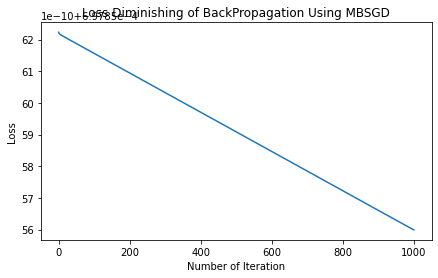

In [271]:
# volatility is pretty HIGH...
# but it may be because PSO has find a good solution

# optimze FFNN using MBSGD

# test using US dataset
array_x = FFNN_train_x[0]
array_y = FFNN_train_y[0]

# 1.MBSGD parameters setting
learn_rate      = 0.01
total_iteration = 1000
batch_size      = len(array_y)+1
seed_bp         = 0

# 2.initialize parameters using _pso
W1, W2, W3, W4, b1, b2, b3, b4 = pso(array_x, array_y)

# 3.read ANN parameters from PSO and feedforeward
a0, s1, a1, s2, a2, s3, a3, s4 = forward_prop(array_x, W1, W2, W3, W4, b1, b2, b3, b4)

# 4.keep the initial loss
loss_bp = [MSE(array_y, s4)]

# 5.reset dataset for MINIBATCH algorithm
df_X  = pd.DataFrame(array_x.T)
df_y  = pd.DataFrame(array_y.T)

# 6.backpropogation using MBSGD
for i in range (total_iteration): 
    # split data into batches
    for Batch in batches (df_X, df_y, size = batch_size, seed = seed_bp):
        
        # get data batches
        (Batch_X, Batch_y) = Batch
        # transform datches into arrays
        Batch_X = np.array(Batch_X).T
        Batch_y = np.array(Batch_y).T
        
        # parameters update
        a0, s1, a1, s2, a2, s3, a3, s4 = forward_prop(Batch_X, W1, W2, W3, W4, b1, b2, b3, b4)
        W1 -= learn_rate * J_W1 (a0, Batch_y)
        W2 -= learn_rate * J_W2 (a0, Batch_y)
        W3 -= learn_rate * J_W3 (a0, Batch_y)
        W4 -= learn_rate * J_W4 (a0, Batch_y)
        b1 -= learn_rate * J_b1 (a0, Batch_y)
        b2 -= learn_rate * J_b2 (a0, Batch_y)
        b3 -= learn_rate * J_b3 (a0, Batch_y)
        b4 -= learn_rate * J_b4 (a0, Batch_y)
        
    # at the end of each iteration, we keep the loss for the all the instances
    a0, s1, a1, s2, a2, s3, a3, s4 = forward_prop(array_x, W1, W2, W3, W4, b1, b2, b3, b4)
    loss = MSE(array_y, s4)
    loss_bp.append(loss)
    
    seed_bp += 1
    # print('at the interation of {:}, MBSGD finds {:.4f} as MSE'.format(i+1, loss))

# 6.plot the diagram of iteration and lossfuntion
plt.figure(figsize = (7,4))
plt.title ('Loss Diminishing of BackPropagation Using MBSGD')
plt.xlabel('Number of Iteration')
plt.ylabel('Loss')
plt.plot(range(1001), loss_bp)

In [272]:
loss_bp

[0.0006978562233113494,
 0.0006978562200246018,
 0.0006978562181791946,
 0.0006978562169961003,
 0.0006978562161173471,
 0.0006978562153784428,
 0.000697856214703801,
 0.0006978562140586891,
 0.0006978562134271472,
 0.0006978562128018416,
 0.000697856212179402,
 0.0006978562115582796,
 0.0006978562109377637,
 0.0006978562103175268,
 0.0006978562096974183,
 0.00069785620907737,
 0.0006978562084573494,
 0.0006978562078373426,
 0.0006978562072173422,
 0.0006978562065973456,
 0.0006978562059773511,
 0.0006978562053573584,
 0.0006978562047373668,
 0.0006978562041173766,
 0.0006978562034973874,
 0.0006978562028773993,
 0.0006978562022574122,
 0.000697856201637426,
 0.000697856201017441,
 0.0006978562003974574,
 0.0006978561997774745,
 0.0006978561991574925,
 0.0006978561985375114,
 0.0006978561979175319,
 0.0006978561972975532,
 0.0006978561966775757,
 0.0006978561960575991,
 0.0006978561954376235,
 0.0006978561948176487,
 0.0006978561941976755,
 0.000697856193577703,
 0.0006978561929577318,